# Exploretory data analysis on risk factors involved in investment by Deutch Bank

## Background
Deutsche Bank is a multinational investment bank and financial services company. It offers a range of investment products to its clients, including stocks, bonds, and derivatives. The bank is concerned about the risk of investment in various products and wants to use data analysis to identify and manage potential risks.

## Objective

To perform data analysis on the investment products offered by Deutsche Bank and identify potential risks associated with each product.

Technical chart for the reliance industries: 

1. MACD
2. Momentum (MOM)
3. Stochastic (STO)
4. CCI

## Deutsch Bank share
With this dataset, we could perform a wide range of analyses and visualizations to understand how the stock price of Deutsche Bank has changed over time, and to identify trends or patterns in the data. 

For example, we could:

- Create a line chart showing the daily closing price of the stock over time.
- Calculate the daily percentage change in the stock price, and create a histogram or density plot to visualize the distribution of these changes.
- Use technical analysis tools to identify patterns or trends in the stock price, such as moving averages or support/resistance levels.
- Perform a regression analysis to model the relationship between the stock price and other variables, such as market indices or macroeconomic indicators.
- Use machine learning algorithms to predict future stock prices based on historical data.

So, I will start with few basic things with these datas over time and compare them with each other.

1. **Basic data exploration:** You can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`
2. Visualize the data using matplotlib and seaborn

3. Calculate returns

4. Analyze relationships between variables

5. Rolling statistics

### About data

To begin the analysis, the bank collects data on its investment products over the past 10 years. The data includes information on the product type, issuer, maturity date, credit rating, and other relevant factors that could impact risk.

**Table summary:**

| Sr. No. | Date | Open | High | Low | Close | Adj Close | Volume |
|---------|------|------|------|-----|-------|-----------|--------|
| ||||||||

Here individual columns are

| Column name | Description |
|-------------|-------------|
| Date | The date of the stock price, in a standardized format (e.g. YYYY-MM-DD). |
| Open | The opening price of the stock on that day. | 
| High |  The highest price of the stock on that day. |
| Low | The lowest price of the stock on that day. |
| Close | The closing price of the stock on that day. |
| Adj Close | The adjusted closing price of the stock on that day. This takes into account any corporate actions (such as stock splits or dividends) that may have affected the stock price. |
| Volume | The volume of shares traded on that day. |

### Data Download & preparation for analysis

In [ ]:
%pip install yfinance --upgrade --quiet

In [ ]:
# Change this
dataset_url = 'https://investor-relations.db.com/share/share-information/historical-share-prices'

In [ ]:
import opendatasets as od
od.download(dataset_url)

In [ ]:
# Change this
data_dir = 'dbdata'

In [ ]:
# Now listing the downloaded files 
import os
os.listdir(data_dir)

In [ ]:
project_name = "Deutch-bank-share" # change this (use lowercase letters and hyphens only)

### Importing important libraries

1. **Numpy:** NumPy is a Python library for scientific computing that provides support for arrays, matrices, and mathematical functions. It is one of the most widely used libraries in the scientific Python ecosystem, and is a fundamental building block for many other Python libraries. NumPy provides the ndarray (n-dimensional array) data structure, which is a collection of elements of the same type, indexed by a tuple of non-negative integers. NumPy also provides a large number of mathematical functions for manipulating arrays, such as mathematical operations (addition, subtraction, multiplication, division, etc.), statistical operations (mean, variance, standard deviation, etc.), and linear algebra operations (matrix multiplication, eigenvalues, etc.).

2. **Pandas:** Pandas is an open-source Python library that is widely used for data manipulation and analysis. One of the most popular features of Pandas is the DataFrame. It is a two-dimensional table-like data structure that allows you to store and manipulate data in a way that is similar to a spreadsheet. A DataFrame consists of rows and columns, where each row represents a unique observation or record, and each column represents a variable or feature of that observation. You can think of a DataFrame as a spreadsheet, where each row is a record, and each column is a field.

3. **Matplotlib:** Matplotlib is a Python library for data visualization that provides a wide range of tools for creating different types of charts and plots. It is one of the most widely used visualization libraries in the scientific Python ecosystem. Matplotlib provides a variety of functions and classes for creating visualizations, such as scatter plots, line charts, bar charts, histograms, and more. These visualizations can be customized in many ways, including changing the colors, labels, axes, and annotations.

4. **Seaborn:** Seaborn is a Python data visualization library built on top of Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics. It provides a range of functions for visualizing data, including categorical data, relational data, and distributional data. Seaborn includes several built-in datasets that can be loaded directly into a DataFrame, making it easy to get started with visualization. The library also provides a variety of options for customizing charts and plots, such as color palettes, themes, and styles.


In this tutorial, we will learn how to create and manipulate DataFrames using and plot using matplotlib/seaborn python libraries.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')

In [37]:
# for reading xlr datafile
%pip install xlrd --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install --upgrade pandas-datareader --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import datetime

#### Creating a DataFrame

In [31]:
# Imorting files
dbbank_df1 = pd.read_csv('deutschebank_share_prices.csv')

In [32]:
dbbank_df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutsche Bank share prices,NaN,NaN,NaN,NaN,NaN
3,Frankfurt (EUR),NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,Date,Open,High,Low,Close,Volume (shares)
6,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
7,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
8,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
9,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"


#### New approach 

So we are seeing that rows 0-4 are not required. So we need to drop them. Instead of using above data read file, we will use following:

In [33]:
# Read the CSV file and skip the fourth and fifth rows
dbbank_df = pd.read_csv('deutschebank_share_prices.csv', header=4, skiprows=[5])

# Set the values in the fifth row as the column names
dbbank_df.columns = dbbank_df.iloc[0]
dbbank_df = dbbank_df[1:]


In [34]:
# Display the resulting DataFrame
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
1,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
2,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
3,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
4,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
5,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"


In [35]:
# displaying the column names
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object', name=0)

### Data Analysis
To analyze the investment products, the bank uses Python libraries such as `numpy`, `scipy`, and `pandas` to perform statistical analysis on the data.

1. First, the bank performs a descriptive analysis of the data to understand the distribution of investment products across various categories. This includes analyzing the frequency of each product type, issuer, and credit rating.

2. Next, the bank uses machine learning techniques such as clustering and classification to identify patterns and potential risks in the data. For example, the bank may use a clustering algorithm to group similar investment products together based on their characteristics, such as credit rating and maturity date. The bank can then analyze the risk profile of each cluster and take appropriate measures to manage the risks.

3. The bank may also use classification algorithms to predict the likelihood of default or other risks associated with a particular investment product. This can help the bank make informed decisions about which products to invest in and which to avoid.

4. Finally, the bank visualizes the data using Python libraries such as `matplotlib` and `seaborn` to communicate the findings to stakeholders. This includes creating charts and graphs that show the distribution of investment products across various categories, as well as the risk profile of each product.

In our present analysis, we will mostly focus on some of the basic type of data anlysis discuss in the 'Data Collection and preparation' section.

#### 1. Basic data exploration
We can use pandas to perform basic exploration of the data, such as checking the dimensions of the DataFrame, looking at summary statistics, or checking for missing values
    - summary statistics: `.describe()`
    - dimensions of the DataFrame: `.shape()`
    - check for missing values: `.isnull().sum())`

In [38]:
# lets first see the first 5 rows of the dataframe
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares)
1,11/28/1997,43.93,44.04,43.71,43.79,"3,196,812"
2,12/01/1997,44.53,44.82,44.41,44.49,"4,185,032"
3,12/02/1997,45.01,45.05,44.45,44.53,"3,881,885"
4,12/03/1997,43.89,44.33,43.66,44.33,"4,823,253"
5,12/04/1997,44.47,44.95,44.10,44.66,"4,539,136"


In [39]:
# checking missing values i.e. NaN valuess
dbbank_df.isnull().sum()

0
Date               0
Open               0
High               0
Low                0
Close              0
Volume (shares)    0
dtype: int64

so good thing is we don't have any missing values in the dataframe of dbabnk.

In [40]:
# shape of the dataframe
dbbank_df.shape

(6397, 6)

In [41]:
# column names in the dataframe
dbbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume (shares)'], dtype='object', name=0)

In [42]:
# datatype of each column
dbbank_df.dtypes

0
Date               object
Open               object
High               object
Low                object
Close              object
Volume (shares)    object
dtype: object

so we find that datee is object type and all other columns are of object type so we need to convert them to appropriate data type. 

In [44]:
# Convert 'Date' column to datetime format
dbbank_df['Date'] = pd.to_datetime(dbbank_df['Date'])

In [45]:
dbbank_df.dtypes

0
Date               datetime64[ns]
Open                       object
High                       object
Low                        object
Close                      object
Volume (shares)            object
dtype: object

In [ ]:
# # Set the "Date" column as the index of the DataFrame
#dbbank_df.set_index(dbbank_df['Date'], inplace=True)

In [47]:
# converting datatype of 'Open' column to float
dbbank_df['Open'] = dbbank_df['Open'].astype(float)

In [48]:
# converting datatype of 'Close' column to float
dbbank_df['Close'] = dbbank_df['Close'].astype(float)

In [49]:
# converting datatype of 'High' column to float
dbbank_df['High'] = dbbank_df['High'].astype(float)

In [50]:
# converting datatype of 'Low' column to float
dbbank_df['Low'] = dbbank_df['Low'].astype(float)

In [52]:
# Since, numbers in Volumn column contains, comma. We need to remove it.
# Replace commas with empty strings
dbbank_df['Volume (shares)'] = dbbank_df['Volume (shares)'].str.replace(',', '')

# Convert to float
dbbank_df['Volume (shares)'] = dbbank_df['Volume (shares)'].astype(float)

In [53]:
dbbank_df.dtypes

0
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume (shares)           float64
dtype: object

In [54]:
# now checking basic statistics of the dataframe
dbbank_df.describe()

,Open,High,Low,Close,Volume (shares)
count,6397.000000,6397.000000,6397.000000,6397.000000,6.397000e+03
mean,35.622334,36.083036,35.102922,35.595854,1.602169e+06
std,21.470437,21.672907,21.257051,21.478197,3.463012e+06
min,4.900000,5.070000,4.470000,4.950000,0.000000e+00
25%,15.340000,15.560000,15.030000,15.320000,3.095080e+05
50%,33.500000,34.000000,32.910000,33.550000,6.178570e+05
75%,51.580000,52.040000,50.960000,51.580000,1.510626e+06
max,91.620000,92.050000,90.340000,91.470000,9.305332e+07


In [58]:
# finding maximum in each column
dbbank_df.max()

0
Date               2023-02-17 00:00:00
Open                             91.62
High                             92.05
Low                              90.34
Close                            91.47
Volume (shares)             93053318.0
dtype: object

In [59]:
# finding minimum in each column
dbbank_df.min()

0
Date               1997-11-28 00:00:00
Open                               4.9
High                              5.07
Low                               4.47
Close                             4.95
Volume (shares)                    0.0
dtype: object

In [60]:
# now we need to find duplicate entries.
dbbank_df.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
6393    False
6394    False
6395    False
6396    False
6397    False
Length: 6397, dtype: bool

So we don't have any duplicate values.

#### 2. Visualize the data using matplotlib and seaborn:

we can use these libraries to create a variety of charts and plots, such as line plots, bar plots, histograms, and scatter plots. 

##### 2.1. Closing price (yearwise)

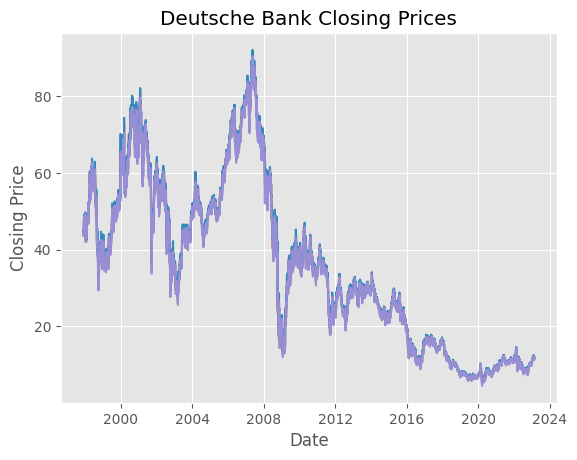

In [65]:
# plot the closing price over time
plt.plot(dbbank_df['Date'], dbbank_df['Close'])
plt.plot(dbbank_df['Date'], dbbank_df['High'])
plt.plot(dbbank_df['Date'], dbbank_df['Low'])
plt.title('Deutsche Bank Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [83]:
# Finding the data for 2022
# Convert the 'Date' column to datetime format
dbbank_df['Date'] = pd.to_datetime(dbbank_df['Date'])
dbbank_df2022 = dbbank_df[dbbank_df['Date'].dt.year == 2022]
dbbank_df2022.head()

,Date,Open,High,Low,Close,Volume (shares),Return
6106,2022-01-03,11.04,11.36,11.04,11.32,183211.0,0.025362
6107,2022-01-04,11.35,11.73,11.35,11.67,688352.0,0.030919
6108,2022-01-05,11.66,11.95,11.62,11.71,541160.0,0.003428
6109,2022-01-06,11.65,12.30,11.65,12.27,735427.0,0.047822
6110,2022-01-07,12.36,12.47,12.13,12.40,647930.0,0.010595


In [84]:
# Finding the data for 2021
dbbank_df2021 = dbbank_df[dbbank_df['Date'].dt.year == 2021]
dbbank_df2021.head()

,Date,Open,High,Low,Close,Volume (shares),Return
5851,2021-01-04,8.99,9.02,8.73,8.80,710306.0,-0.021135
5852,2021-01-05,8.78,8.94,8.75,8.87,400596.0,0.007955
5853,2021-01-06,8.93,9.43,8.89,9.42,970558.0,0.062007
5854,2021-01-07,9.42,9.58,9.18,9.51,879142.0,0.009554
5855,2021-01-08,9.55,9.65,9.45,9.45,518616.0,-0.006309


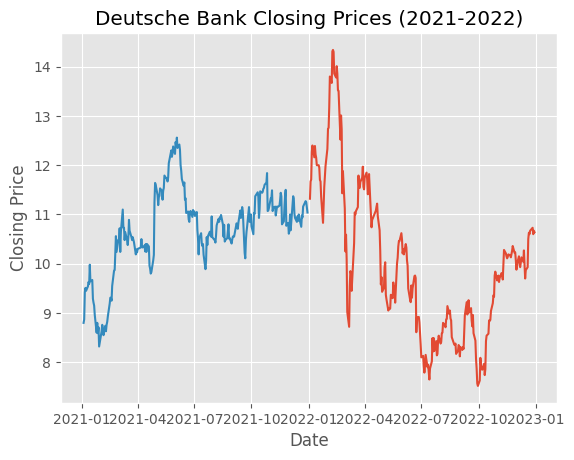

In [91]:
# plot the closing price 2021 and 2022 together
plt.plot(dbbank_df2022['Date'], dbbank_df2022['Close'])
plt.plot(dbbank_df2021['Date'], dbbank_df2021['Close'])
plt.title('Deutsche Bank Closing Prices (2021-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

##### 2.2. Calculate returns

The `pct_change()` function used in the first line calculates the percentage change between the current and a prior element, by default, the prior element is the element in the previous row. 

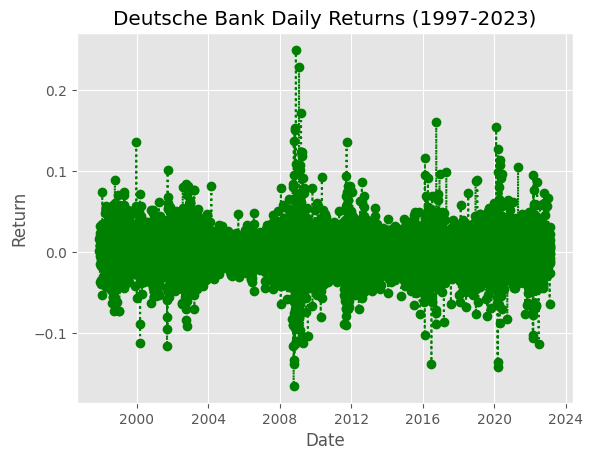

In [97]:
# calculate daily returns
dbbank_df['Return'] = dbbank_df['Close'].pct_change()
# plot the returns over time
plt.plot(dbbank_df['Date'], dbbank_df['Return'], 'go:')
plt.title('Deutsche Bank Daily Returns (1997-2023)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In the case of the `dbbank_df['Return']` column, `pct_change()` is applied to the `Close` column of the DataFrame, which contains the closing prices of Deutsche Bank's stock. The resulting `Return` column contains the daily percentage changes in the stock price.

If you want to specify a window for the calculation of returns, you can use the `rolling()` function provided by pandas (discussed below). For example, to calculate the 10-day rolling average of daily returns, you can modify the first line of the code as follows:

In [109]:
dbbank_df['Close'].pct_change().rolling(10).mean()

1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
          ...   
6393   -0.006814
6394   -0.005161
6395   -0.007197
6396    0.002286
6397    0.002799
Name: Close, Length: 6397, dtype: float64

If we want to see the 

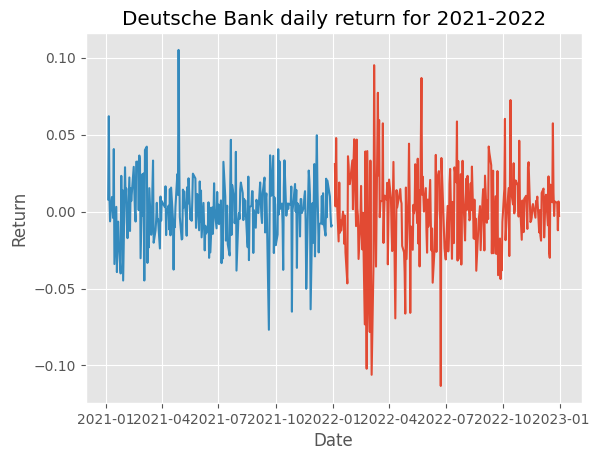

In [110]:
# plot the closing price 2021 and 2022 together
plt.plot(dbbank_df2022['Date'], dbbank_df2022['Close'].pct_change())
plt.plot(dbbank_df2021['Date'], dbbank_df2021['Close'].pct_change())
plt.title('Deutsche Bank daily return for 2021-2022')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

Calculating current close and previous closing value

In [100]:
dbbank_df.tail()

,Date,Open,High,Low,Close,Volume (shares),Return
6393,2023-02-13,11.32,11.42,11.30,11.41,30606.0,0.008842
6394,2023-02-14,11.38,11.60,11.38,11.58,26132.0,0.014899
6395,2023-02-15,11.56,11.56,11.40,11.42,9519.0,-0.013817
6396,2023-02-16,11.49,11.85,11.49,11.77,38652.0,0.030648
6397,2023-02-17,11.80,12.06,11.77,11.81,90125.0,0.003398


In [104]:
# Retrieve the current close and previous closing value
current_close = dbbank_df['Close'].iloc[-1]
previous_close = dbbank_df['Close'].iloc[-2]

# Print the values
print("Current Close:", current_close)
print("Previous Close:", previous_close)
print("5 Day Back closing Price :",dbbank_df['Close'].iloc[-6])

Current Close: 11.81
Previous Close: 11.77
5 Day Back closing Price : 11.31


In this code, we are first selecting the `Close` column from the dataframe using `df['Close']`. We then use the iloc function to select the last row (`iloc[-1]`) and second last row (`iloc[-2]`) from this column to get the current and previous closing values respectively. Finally, we print the values using the `print()` function.

In [105]:
dbbank_df.head()

,Date,Open,High,Low,Close,Volume (shares),Return
1,1997-11-28,43.93,44.04,43.71,43.79,3196812.0,NaN
2,1997-12-01,44.53,44.82,44.41,44.49,4185032.0,0.015985
3,1997-12-02,45.01,45.05,44.45,44.53,3881885.0,0.000899
4,1997-12-03,43.89,44.33,43.66,44.33,4823253.0,-0.004491
5,1997-12-04,44.47,44.95,44.10,44.66,4539136.0,0.007444


#### 4. Analyze relationships between variables
You can use seaborn to create scatter plots and regression plots to explore the relationships between variables. 

In [ ]:
sns.set(style='whitegrid')
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='Open', y='Close', color="blue")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

In [ ]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Low')
plt.title('Deutsche Bank High vs. Low')
plt.show()

In [ ]:
dbbank_df.columns

In [ ]:
# create a scatter plot of Open vs. Close
sns.scatterplot(data=dbbank_df, x='High', y='Volume (shares)', color="g")
plt.title('Deutsche Bank Open vs. Close')
plt.show()

In [ ]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df, y='Return', x='Volume (shares)', color = 'g')

**Note:** Regression line: A regression line is an estimate of the line that describes the true, but unknown, linear relationship between the two variables.

Clearly the two variables doesnot show a strong relationship.

In [ ]:
#Scatter Plot with Regression Line using Seaborn
sns.regplot(data=dbbank_df, y='High', x='Volume (shares)')

In this case, we can say that, wheen volume is high, the share prices go high. 

In [ ]:
# Scatter Plot with Marginal Histograms along with linear regression
sns.jointplot(data=dbbank_df, x='High', y='Volume (shares)', kind="reg", color='red', marker=".")

**Note:** 

*Marginal distribution:* The marginal distribution of a variable is the probability distribution of that variable alone, ignoring the values of any other variables. For two variables, the marginal distribution of one variable can be obtained by summing the joint probability distribution over all values of the other variable.

> For example, if X and Y are two random variables with joint probability distribution p(X, Y), the marginal distribution of X is given by p(X) = ∑p(X, Y), where the sum is taken over all possible values of Y. Similarly, the marginal distribution of Y can be obtained by summing the joint distribution over all values of X.

> It represents the bi-variate distribution using scatterplot() and the marginal distributions using histplot().

#### 5. Rolling statistics
You can use pandas to calculate rolling statistics such as rolling mean, rolling standard deviation, and rolling correlation.

For example, to calculate the 30-day rolling mean of the closing price:

In [ ]:
# Calculate rolling mean with window size 30
rolling_mean = dbbank_df['Close'].rolling(window=30).mean()

# Calculate rolling standard deviation with window size 30
rolling_std = dbbank_df['Close'].rolling(window=30).std()

In [ ]:
# plot the rolling mean over time
plt.plot(dbbank_df['Date'], rolling_mean)
plt.plot(dbbank_df['Date'], rolling_std)
plt.title('Deutsche Bank 30-Day Rolling Mean of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

6. **Correlation:**

    To calculate correlations, we need to calculate the shifted value.

    > Shifting the rows in this case can be useful for calculating changes in the 'High' column values between consecutive time periods. By shifting the 'High' column one row downwards, you can compare each value with its previous value and calculate the change.

    > For example, if you subtract the shifted 'High' column from the original 'High' column, you get a new column that contains the difference in 'High' values between each consecutive time period. This can be useful for calculating metrics like daily price changes or volatility.

    > `dbbank_df['high_change'] = dbbank_df['High'] - dbbank_df['High'].shift()`

    > In this code, the shift() method is used to shift the 'High' column one row downwards, so that each value in the 'High' column is now compared with its previous value. Note that the first value in the 'high_change' column will be `NaN`, as there is no previous value to subtract from the first row.

In [ ]:
# Create another column with shifted values of 'value' column
dbbank_df['shifted_high'] = dbbank_df['High'].shift()
dbbank_df['shifted_low'] = dbbank_df['Low'].shift()
dbbank_df['shifted_close'] = dbbank_df['Close'].shift()

we notice here that Date is used here as index as well as Column. This is due to the fact that we need some times Date as column.

In [ ]:
# Calculate rolling correlation with window size 10
rollinghigh_corr = dbbank_df['High'].rolling(window=10).corr(dbbank_df['shifted_high'])
rollinglow_corr = dbbank_df['Low'].rolling(window=10).corr(dbbank_df['shifted_low'])
rollingClose_corr = dbbank_df['Close'].rolling(window=10).corr(dbbank_df['shifted_close'])

In [ ]:
plt.plot(dbbank_df['High'], label='High')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rollinghigh_corr, label='Correlation High')
plt.legend()
plt.show()

clearly, high value does not correlations show any correlation.

In [ ]:
plt.plot(rollinghigh_corr, label='Correlation high with year')
plt.plot(rollinglow_corr, label='Correlation low with year')
plt.plot(rollingClose_corr, label='Correlation close with year')
plt.legend()
plt.show()

In [ ]:
plt.plot(dbbank_df['Close'], label='Close')
plt.plot(rollingClose_corr, label='Correlation, close')
plt.legend()
plt.show()

#### 6. Moving average convergence divergence (MACD)
You can use pandas to calculate the MACD, a popular technical indicator used in trading. For example, to calculate the 12-day and 26-day exponential moving averages and the MACD:

In [ ]:
# calculate 12-day and 26-day exponential moving averages
ema12 = dbbank_df['Close'].ewm(span=12, adjust=False).mean()
ema26 = dbbank_df['Close'].ewm(span=26, adjust=False).mean()
# calculate MACD
macd = ema12 - ema26
# plot the MACD over time
plt.plot(dbbank_df['Date'], macd, label = 'MACD')
plt.plot(dbbank_df['Date'], dbbank_df['Close'], label= "Close")
plt.title('Deutsche Bank 2000-2023')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

#### 7. Bollinger Bands
You can use pandas to calculate Bollinger Bands, another popular technical indicator used in trading.

In [ ]:
# calculate 20-day moving average and standard deviation
dbbank_df['MA20'] = dbbank_df['Close'].rolling(window=20).mean()
dbbank_df['StdDev'] = dbbank_df['Close'].rolling(window=20).std()
# calculate upper and lower Bollinger Bands
dbbank_df['UpperBand'] = dbbank_df['MA20'] + 2 * dbbank_df['StdDev']
dbbank_df['LowerBand'] = dbbank_df['MA20'] - 2 * dbbank_df['StdDev']
# plot the Bollinger Bands over time
plt.plot(dbbank_df['Date'], dbbank_df['Close'])
plt.plot(dbbank_df['Date'], dbbank_df['MA20'])
plt.plot(dbbank_df['Date'], dbbank_df['UpperBand'])
plt.plot(dbbank_df['Date'], dbbank_df['LowerBand'])
plt.title('Deutsche Bank Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

#### 8. Compare with market indices
You can use pandas to download and compare the Deutsche Bank share data with market indices such as the DAX, FTSE, or S&P 500. For example, to download the DAX data and compare it with the Deutsche Bank share data:

1. aapl_df = apple
2. bac_df = Bank of amerika
3. citi_df = citibank
4. gs_df = Goldman Sachs
5. jpm_df = JPMorgan
6. ms_df = morgan Stanlay

Columns:
Date	| Open	| High	| Low	| Close	| Adj Close	| Volume |

In [ ]:
aapl_dfcopy = aapl_df.drop('Adj Close', axis=1)

In [ ]:
bac_dfcopy = bac_df.drop('Adj Close', axis=1)

In [ ]:
citi_dfcopy = citi_df.drop('Adj Close', axis=1)

In [ ]:
gs_dfcopy = gs_df.drop('Adj Close', axis=1)

In [ ]:
jpm_dfcopy = jpm_df.drop('Adj Close', axis=1)

In [ ]:
ms_dfcopy =ms_df.drop('Adj Close', axis=1)

In [ ]:
dbbank_dfnew = dbbank_df.drop(['shifted_high', 'shifted_low', 'shifted_close', 'MA20', 'StdDev', 'UpperBand', 'LowerBand'], axis=1)

In [ ]:
merge1_df = pd.concat([dbbank_dfnew, aapl_dfcopy, bac_dfcopy, citi_dfcopy, gs_dfcopy, jpm_dfcopy, ms_dfcopy], axis=1, ignore_index=True)

In [ ]:
start_date = 2006-01-03
end_date = 2023-02-16

In [ ]:
merged2_df = dbbank_df.merge(aapl_dfcopy, on='Date', how='left')
merged2_df

In [ ]:
df['Returns_DAX'] = dbbank_df['Close_dax'].pct_change()
# plot the daily returns for Deutsche Bank and DAX over time
plt.plot(dbbank_df['Date'], dbbank_df['Returns'], label='Deutsche Bank')
plt.plot(dbbank_df['Date'], dbbank_df['Returns_DAX'], label='DAX')
plt.title('Deutsche Bank vs. DAX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

```
 # merge DAX data with Deutsche Bank share data
df = pd.merge(dbbank_df, aapl_dfcopy, bac_dfcopy, citi_dfcopy, gs_dfcopy, jpm_dfcopy, ms_dfcopy , on='Date', suffixes=('_db', '_dax'))
# calculate daily returns for DAX
df['Returns_DAX'] = dbbank_df['Close_dax'].pct_change()
# plot the daily returns for Deutsche Bank and DAX over time
plt.plot(dbbank_df['Date'], dbbank_df['Returns'], label='Deutsche Bank')
plt.plot(dbbank_df['Date'], dbbank_df['Returns_DAX'], label='DAX')
plt.title('Deutsche Bank vs. DAX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

#### 9. Perform statistical analysis
You can use pandas to perform statistical analysis on the Deutsche Bank share data. For example, to calculate the mean, standard deviation, and correlation coefficient of the closing price and volume:

In [ ]:
dbbank_df.head()

In [ ]:
# calculate mean, standard deviation, and correlation coefficient of closing price and volume
mean_close = dbbank_df['Close'].mean()
std_close = dbbank_df['Close'].std()
mean_volume = dbbank_df['Volume (shares)'].mean()
std_volume = dbbank_df['Volume (shares)'].std()
corr = dbbank_df['Close'].corr(dbbank_df['Volume (shares)'])
print('Mean closing price:', mean_close)
print('Standard deviation of closing price:', std_close)
print('Mean volume:', mean_volume)
print('Standard deviation of volume:', std_volume)
print('Correlation coefficient of closing price and volume:', corr)

# Downloading other share prices

In [ ]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Get the data for the stock AAPL
aapl_df = yf.download('AAPL','2006-01-01','2023-02-17')
aapl_df = aapl_df.reset_index()
aapl_df

In [ ]:
# Bank of Amerika
bac_df = yf.download('BAC','2006-01-01','2023-02-17')
bac_df = bac_df.reset_index()
bac_df

In [ ]:
# Citigroup
citi_df = yf.download('C','2006-01-01','2023-02-17')
citi_df = citi_df.reset_index()
citi_df

In [ ]:
# Goldman Sachs
gs_df = yf.download('GS','2006-01-01','2023-02-17')
gs_df = gs_df.reset_index()
gs_df

In [ ]:
# JPMorgan Chase
jpm_df = yf.download('JPM','2006-01-01','2023-02-17')
jpm_df = jpm_df.reset_index()
jpm_df

In [ ]:
# Morgan Stanlay
ms_df = yf.download('MS','2006-01-01','2023-02-17')
ms_df = ms_df.reset_index()
ms_df

In [ ]:
# Wells Fargo
wf_df = yf.download('WF','2006-01-01','2023-02-17')
wf_df = wf_df.reset_index()
wf_df

In [ ]:
# create a dictionary with the dataframes
dfs = {'df1': dbbank_df, 
       'df2': aapl_df,
       'df3': bac_df,
       'df4': citi_df,
       'df5': gs_df,
       'df6': jpm_df,
       'df7': ms_df}
dfs

In [ ]:
dfs.keys()

Extra for future reference

In [ ]:
import yfinance as yf
import pandas as pd

# Set the ticker symbol for Deutsche Bank
tickerdb = 'DB'
tickerbac = 'BAC'

# Download the live share price data for Deutsche Bank
db_stock_data = yf.download([tickerdb,tickerbac], period='1d', interval='1m')

# Download the live share price data for Deutsche Bank
# bac_stock_data = yf.download(tickerbac, period='1d', interval='1m')

# Create a pandas dataframe from the stock data
db_df = pd.DataFrame(db_stock_data)

# Print the dataframe to verify the data has been imported
db_df

**Extra;**

The below code shows how to get data for AAPL from 2016 to 2019 and plot the adjusted closing price of the data.

https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836

In [ ]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

Data for multiple stocks:

In the below code, we will fetch the data of multiple stocks and store it in a dataframe data. Then we will calculate the daily returns and plot the cumulative returns of all the stock prices using matplotlib package.

In [ ]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

In [ ]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Minute level data:

Through yfinance, you can also fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter on line no 8 below. Following values are supported in the interval: 1m, 5m, 15m, 30m, 60m.

In [ ]:
# Import package
import yfinance as yf

# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print the data
print(data.tail())

You can analyze this data, create a trading strategy and analyze the performance of the strategy using the pyfolio package. It computes the Sharpe ratio, Sortino ratio, maximum drawdowns and many other metrics.

## Conclusion

Through data analysis, Deutsche Bank is able to identify potential risks associated with its investment products and take appropriate measures to manage those risks. This helps the bank make informed decisions about which products to invest in and which to avoid, ultimately reducing the overall risk of its investment portfolio.

# Reference

1. https://investor-relations.db.com/share/share-information/historical-share-prices
2. https://www.zaner.com/3.0/education/technicalstudies/MA.asp#top
3. https://www.linkedin.com/pulse/stock-data-analysis-using-python-sakshi-grover/ (have to do some of these)